# Practice - Basic Classifiers

Coding practice for main classifiers introduced in Chapter 3. This practice is based on work by Li-Yi Wei et al. and our textbook Python Machine Learning (2nd Edition).

# Hand-written Digit Classification

In the chapter 3 sample codes we applied different scikit-learn classifers for the Iris data set.

In this practice, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why? Please share your code on our Moodle forum. :-) 

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

## Load data

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


## Visualize data

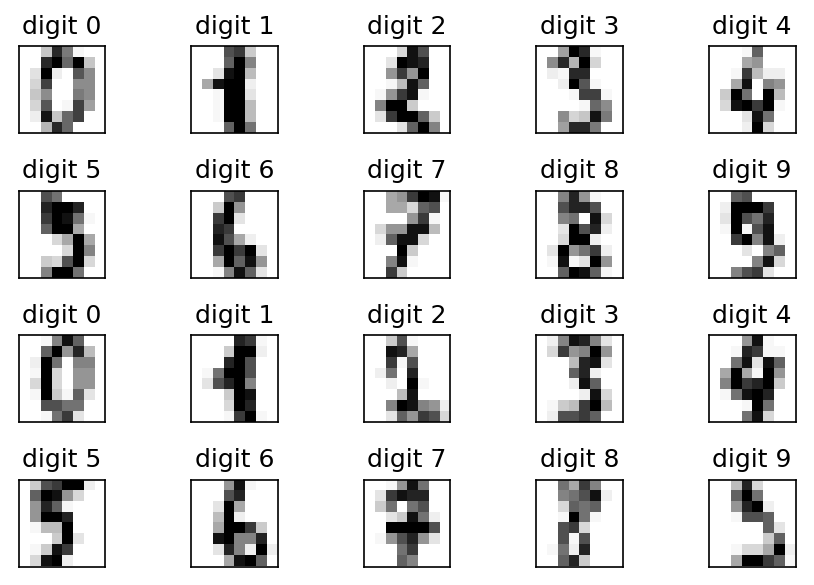

In [2]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Date Preprocessing
Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [3]:
#Your code comes here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

stdsc = StandardScaler()
stdsc.fit(X_train)
X_train_std = stdsc.transform(X_train)
X_test_std = stdsc.transform(X_test)

## Classifier #1 Perceptron

In [60]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(max_iter=100, tol=1e-3, eta0=0.01)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_train_std)
print('Number of misclassified training samples:',(y_train!=y_pred).sum())
print('Accuracy is %.4f' % accuracy_score(y_test, ppn.predict(X_test_std)))

Number of misclassified training samples: 38
Accuracy is 0.9444


## Classifier #2 Logistic Regression

In [61]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=10.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Accuracy is %.4f' % accuracy_score(y_test, lr.predict(X_test_std)))

Accuracy is 0.9611


## Classifier #3 SVM

In [62]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=0.2, random_state=1)
svm.fit(X_train_std, y_train)
print('Accuracy is %.4f' % accuracy_score(y_test, svm.predict(X_test_std)))

Accuracy is 0.9889


## Classifier #4 Decision Tree

In [63]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=15, random_state=1)
tree.fit(X_train_std, y_train)
print('Accuracy is %.4f' % accuracy_score(y_test, tree.predict(X_test_std)))

Accuracy is 0.8667


## Classifer #5 Random Forest

In [64]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=100,random_state=1, n_jobs=1)
forest.fit(X_train_std, y_train)
print('Accuracy is %.4f' % accuracy_score(y_test, forest.predict(X_test_std)))

Accuracy is 0.9722


## Classifier #6 KNN

In [65]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)
print('Accuracy is %.4f' % accuracy_score(y_test, knn.predict(X_test_std)))

Accuracy is 0.9722


## SVM is good at classification problems and it performs the best. Decision Tree performes the worst, since it may suffer from overfitting.